0.37603192768150456
1.5041277107260183
3.3842873491335403
6.016510842904073
trigger
6.016510842904073
q


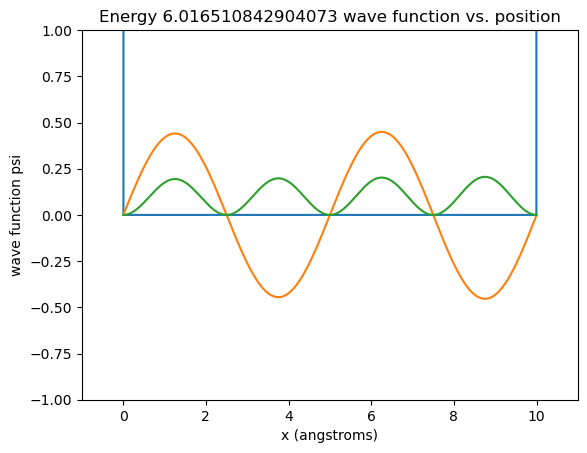

In [28]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  3 15:04:15 2019

@author: Dviolette, Swappenstein, Jterry
"""

import sys 
import math

stdout =sys.stdout
sys.stdout = stdout

import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

#adjust these values to find the eigenvalues of the infinite square well
E_steps= 15
startingEnergy = 0
endingEnergy = 5

#adjust this value to change the starting guess of the slope of the wavefunction in the shooting method
slopeGuess = 2.0

#adjust these valuesa to change the size of the box
LeftEdgeOfBox=0.0
RightEdgeOfBox= 10
with_of_box = RightEdgeOfBox-LeftEdgeOfBox

#adjust mass of particle
#m = 1/206.768  #mass of a Muon in relation to an electron under one
m = 1 #mass of the electron

ħ2overme = 7.62 # planks constant squared over the mass of an electron on an electron units are electron volts angstrums squared
x_steps = 2000
yi=0
vi=0

#use this to change the size of the graph of the functional 
Y_min=-20
Y_max=20
X_min=startingEnergy-4
X_max=endingEnergy + 4

#use this to change the size of the graph of the wavefunctions 
y_min=-1
y_max=1
x_min=LeftEdgeOfBox-1
x_max=RightEdgeOfBox+1

# Defines the 1D arrays to be used in the computation and # sets all values in the arrays to zero
psi_prime = np.zeros(x_steps)
psi = np.zeros(x_steps)
v_x = np.zeros(x_steps)

psi_endofbox=0.0
epslion=.0000001
Earray=[]

# Defines the 1D arrays to be used in the computation and # sets all values in the arrays to zero
psi_prime = np.zeros(x_steps)
psi = np.zeros(x_steps)
v_x = np.zeros(x_steps)

#functions used to shorten code  
def plots(X_value,Y_value,Y_min,Y_max,X_min,X_max,Yname,Xname,title):
    plt.plot(X_value, Y_value )
    plt.ylim((Y_min,Y_max))
    plt.xlim((X_min,X_max))
    plt.ylabel(Yname)
    plt.xlabel(Xname)
    plt.title(title)
    
def Eulers_method(B, i): 
    
    #Implement the shooting method
    #
    #
    #     Yi+1 = Yi + Y'i*Δx                      
    #     Y'i+1 = Y'i + Δx * 2*m*(V-E)                           
    #                        _________  Yi                     
    #                               2                            
    #                          hbar      
            
    psi[0]=0.0
    psi_prime[0]=slopeGuess
    i=i+1
    while i < len(xpoints):
        Δx = xpoints[i]-xpoints[i-1]
        psi[i]=psi[i-1]+Δx*psi_prime[i-1]
        psi_double_prime=m*2.0/ħ2overme*(v_x[i-1]-B)*psi[i-1]
        psi_prime[i]=psi_prime[i-1]+Δx*psi_double_prime
        i=i+1
 

#Set up the x axis points within the 1D Box and
#Populate the Potential Energy of the Infinite Square Well
i=0
xpoints = np.linspace(LeftEdgeOfBox, RightEdgeOfBox, x_steps)
while i < len(v_x):
    if i==0 :
        v_x[i] = 2000000
    if i==len(v_x)-1:
        v_x[i] = 2000000

    i=i+1
     
# Plotting Results
plots(xpoints,v_x,0,20,x_min,x_max,'potential (ev)','x (angstroms)','potential vs. position')


eigenEnergy = [0] * 10
q=0

while q < len(eigenEnergy):

    eigenEnergy[q] = ((q+1)**2 * ħ2overme * math.pi ** 2)/(2*m*with_of_box**2)
    print(eigenEnergy[q])
    if(endingEnergy < eigenEnergy[q]):
        print("trigger")
        print(eigenEnergy[q])
        if(abs(endingEnergy - eigenEnergy[q]) > abs(eigenEnergy[q-1] - endingEnergy)):
            endingEnergy = eigenEnergy[q-1]
            print("q-1")
            break
        else:
            endingEnergy = eigenEnergy[q]
            print("q")
            break
    q = q + 1
    
i = 0
Eulers_method(endingEnergy,i)

#tripFlag = True
#k=0
#Calculate the wavefunction and normalize
 
#i=0
#shift = .001
#Eulers_method(endingEnergy+shift, i)
#more = psi[len(psi)-1]
#Eulers_method(endingEnergy-shift, i)
#less = psi[len(psi)-1]
#chose what direction is closer to energy guess    
#if( (abs(less) - abs(more)) > 0):
#    while tripFlag:
#        endingEnergy = endingEnergy + shift
#        Eulers_method(endingEnergy, i)
#        k=k+1
#        if( abs(psi[len(psi)-1]) < 0.01 or k >= 5000):
#            tripFlag=False
#else:
#    while tripFlag:
#        endingEnergy = endingEnergy - shift
#        Eulers_method(endingEnergy, i)  
#        k=k+1
#        if( abs(psi[len(psi)-1]) < 0.01 or k >= 5000):
#            tripFlag=False
 
   

  
#Calculate the area under the probability curve Y*Ydx 
psistarpsi=psi*psi
total=sum(psistarpsi)
mean=total/(x_steps)
integral=mean*with_of_box
psistarpsi=psistarpsi/integral
psi=psi/np.sqrt(integral)


plots(xpoints,psi,y_min,y_max,x_min,x_max,'wave function psi','x (angstroms)','Energy '+ str(endingEnergy)+ ' wave function vs. position')
plots(xpoints,psistarpsi,y_min,y_max,x_min,x_max,'wave function psi','x (angstroms)','Energy '+ str(endingEnergy)+ ' wave function vs. position')
plt.show()
